In [92]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, assemble, Aer, QuantumRegister, ClassicalRegister, transpile, execute
from qiskit.circuit import Parameter
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
from mpl_toolkits.mplot3d import Axes3D

# Quantum Game Theory - Entanglement Circuits

Define $|C\rangle$ for coperate and $|D\rangle$ for defect.  
Alice and Bob have each the qubit that can be alterated by the other qubit with the entanglement.  
The system is initializate in cooperation in $|CC\rangle$.
For t = 0 there is not entanglement and with t = 1 the entanglement is max.

We define the Payoff table like follow. Where if both player cooperate each others they will get a expectation value in average of 3. If both player defect each other the expectation value is 1.

$$ \begin{pmatrix}
[3,3] & [0,5] \\
[5,0] & [1,1] \\
\end{pmatrix}
$$

We can calculate the payoff that each player multiply the expectation value of each decision with his corresponding probability.
For example; if we can an equal probabily that each player cooperate or defect. Then, alice payoff playing with defect is:

$$ A_{payoff_D} = 5*(0.5)+1*(1) = 3 $$

We will define the function to save the matrix representation for the J matrix the J dagger matrix and the matrices related with Alice and Bob.

In [373]:
# Define all the gates. The J matrix and J matrix hermitian.
def JMatrix(theta):
    M = np.matrix([[np.cos(theta/2), 0, 0, 1j*np.sin(theta/2)],
             [0, np.cos(theta/2), -1j*np.sin(theta/2), 0],
             [0, -1j*np.sin(theta/2), np.cos(theta/2), 0],
             [1j*np.sin(theta/2), 0, 0, np.cos(theta/2)]])
    return M

#Define the matrix bob and alice decision.
def U2Matrix(t,p):
    M = np.matrix([[np.exp(1j*p)*np.cos(t/2), np.sin(t/2)],
            [-np.sin(t/2), np.exp(-1j*p)*np.cos(t/2)]])
    return M

#This two matrices are related with the confiden and the defect matrix representation.
C = U2Matrix(0,0)
D = U2Matrix(np.pi, 0)

Now, we will created the parametrized function that takes the level of entanglement and the Ta and Tb value.
This function return of the expectation value of tha game.

In [374]:
# Define the function to storage all the values.
#This funcion create the parametrice the function in term of circuits and otehrs.

def CircuitImplementation(ta, tb, theta):
    #Created the matrices.
    M = JMatrix(theta)
    Md = M.getH()
    J = Operator(M)
    Jd = Operator(Md)
    #Condicion for the different values of ta and tb.
    if(0<=ta<=1):
        Ma = U2Matrix(ta*np.pi, 0)
    else:
        Ma = U2Matrix(0, -ta*np.pi/2)
    
    if(0<=tb<=1):
        Mb = U2Matrix(tb*np.pi, 0)
    else:
        Mb = U2Matrix(0, -tb*np.pi/2)

    Ua = Operator(Ma)
    Ub = Operator(Mb)

    #Define the circuit implementation
    qc = QuantumCircuit(2)

    qc.append(J,[0,1])
    qc.append(Ua,[0])
    qc.append(Ub,[1])
    qc.append(Jd,[0,1])

    qc.measure_all()
    #Simulate the values.
    Simulation = Aer.get_backend('qasm_simulator')
    Quantum_Transpiler = transpile(qc,Simulation)
    Quantum_Obj = assemble(Quantum_Transpiler, shots=1000)
    Result = Simulation.run(Quantum_Obj).result()
    Counts = Result.get_counts()
    #Payoff matrix.
    M = np.array([[3,5],[0,1]])
    #Expectation value.
    A = 0.0
    for i in Counts.keys():
        A = A + M[int(i[0]),int(i[1])]*int(Counts[i])/1000

    return A

# Quantum Game with no entanglement circuit t = 0

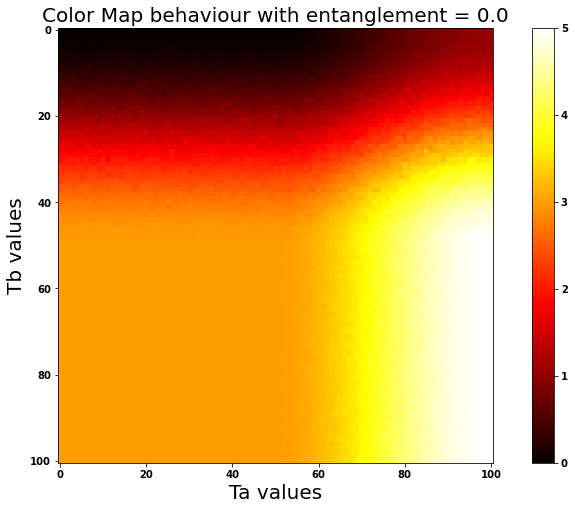

In [441]:
# We create the range of the values for plotting.
entanglement = 0.0
x = np.linspace(-1,1,101)
Data = [[ None for y in range( len(x) ) ]
             for k in range( len(x) )]

for i in range(0,len(x)):
    for j in range(0,len(x)):
        Data[i][j] = CircuitImplementation(x[j],-x[i],entanglement)

#PLotting the matrix representation.
plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)

plt.imshow(Data, cmap = 'hot')
plt.title("Color Map behaviour with entanglement = {}".format(entanglement))
plt.xlabel("Ta values")
plt.ylabel("Tb values")
plt.colorbar()

plt.show()

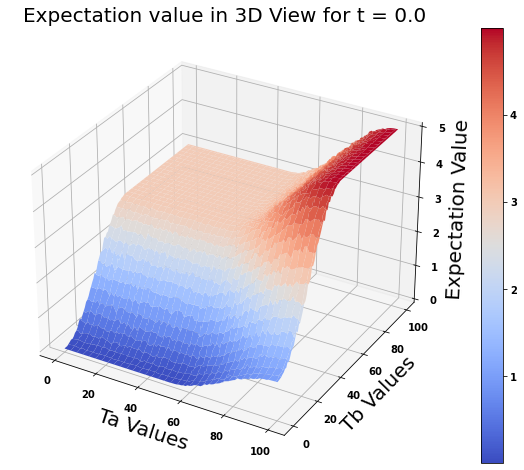

In [442]:
def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[0]), np.arange(matrix.shape[1]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

P = np.array(Data)
m = np.fromfunction(lambda x, y: P, (30, 30))

(fig, ax, surf) = surface_plot(m, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_title('Expectation value in 3D View for t = {}'.format(entanglement))
ax.set_xlabel('Ta Values')
ax.set_ylabel('Tb Values')
ax.set_zlabel('Expectation Value')

plt.show()

# Quantum Game with entanglement circuit t = 1

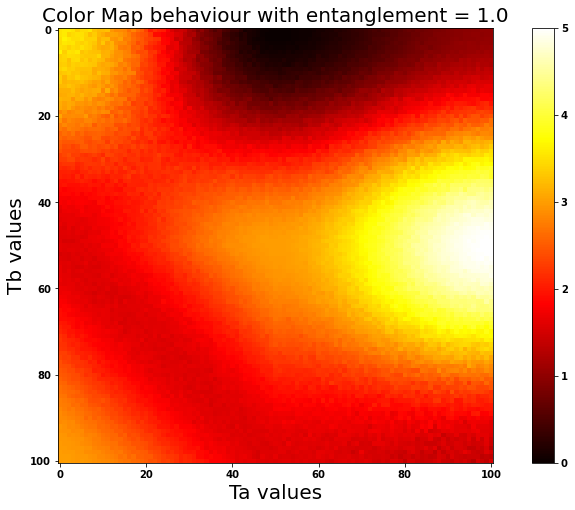

In [443]:
# We create the range of the values for plotting.
entanglement = 1.0
x = np.linspace(-1,1,101)
Data = [[ None for y in range( len(x) ) ]
             for k in range( len(x) )]

for i in range(0,len(x)):
    for j in range(0,len(x)):
        Data[i][j] = CircuitImplementation(x[j],-x[i],entanglement)

#PLotting the matrix representation.
plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)

plt.imshow(Data, cmap = 'hot')
plt.title("Color Map behaviour with entanglement = {}".format(entanglement))
plt.xlabel("Ta values")
plt.ylabel("Tb values")
plt.colorbar()

plt.show()

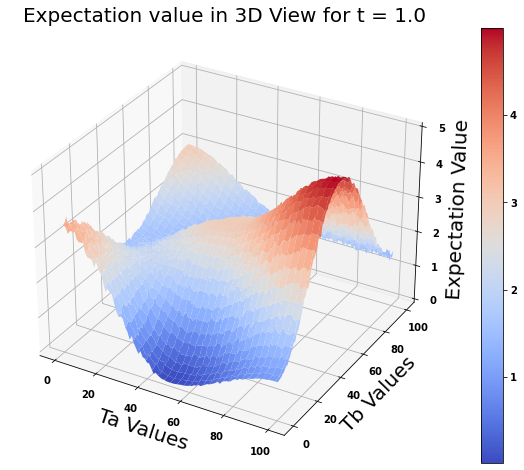

In [444]:
def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[0]), np.arange(matrix.shape[1]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

P = np.array(Data)
m = np.fromfunction(lambda x, y: P, (30, 30))

(fig, ax, surf) = surface_plot(m, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_title('Expectation value in 3D View for t = {}'.format(entanglement))
ax.set_xlabel('Ta Values')
ax.set_ylabel('Tb Values')
ax.set_zlabel('Expectation Value')

plt.show()